In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
#https://3months.tistory.com/325
#https://wikidocs.net/16574

In [2]:
df = pd.read_csv("titanic.csv")

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


## 명목형변수 숫자값으로 되어 있는 거 object로 바꿔주기

In [5]:
df.info()
#Survived, Pclass 는 명목형 변수인데 숫자값이라 int64로 되어 있음
#명목형(object, string)으로 바꿔주자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df['Survived'] = df['Survived'].astype(object)
df['Pclass'] = df['Pclass'].astype(object)

## 결측치 처리

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / df.shape[0]
missing_df.loc[missing_df['ratio'] != 0]
#결측치가 전체의 몇프로인지 보기
#cabin은 결측치가 너무 많으므로 행 제거할 수 없음 -> 대체값 쓰기
#Embarked는 행 제거해도 무방할 듯

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


In [13]:
#cabin 명목형이었으므로 최빈값으로 결측치 채워주기
freq_values = df['Cabin'].value_counts().index[0]
df['Cabin'] = df['Cabin'].fillna(freq_values)

In [16]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


## 종속변수 확인

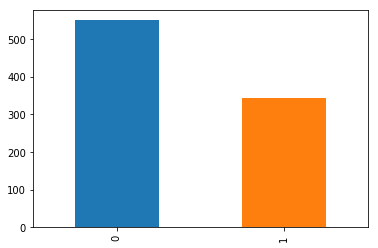

In [18]:
df['Survived'].value_counts().plot(kind='bar')
plt.show()

## 명목형 변수 확인하고 카테고리 너무 많은 건 쓰지 않기

In [20]:
category_feature = [ col for col in df.columns if df[col].dtypes == "object"]
category_feature 

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [21]:
category_feature = list(set(category_feature) - set(['PassengerId','Survived']))
category_feature

['Embarked', 'Name', 'Ticket', 'Sex', 'Cabin', 'Pclass']

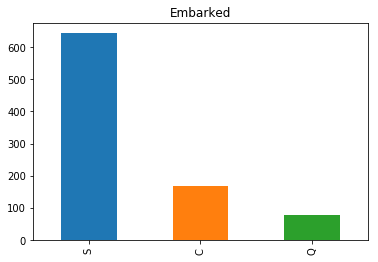

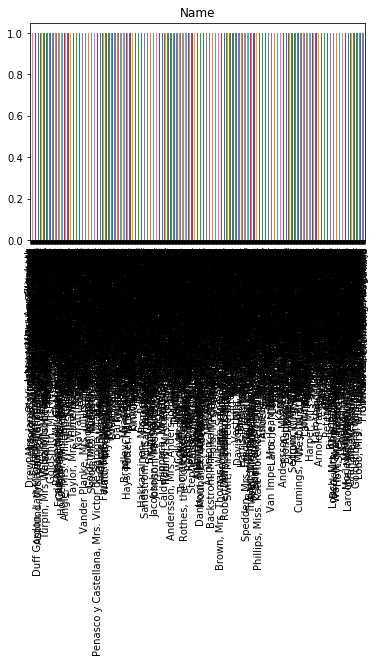

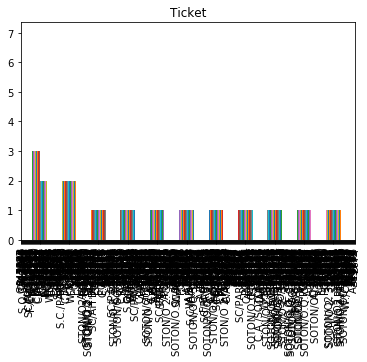

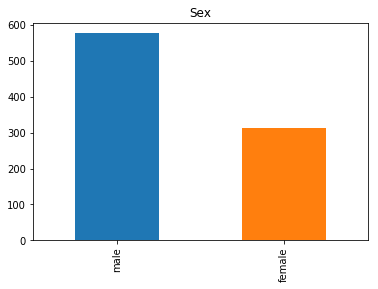

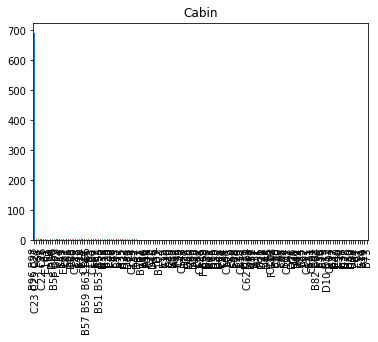

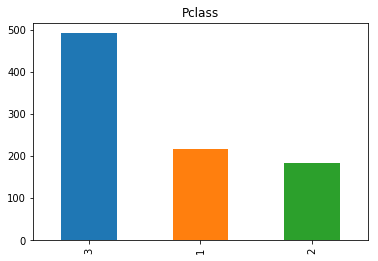

In [24]:
for col in category_feature:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [25]:
df.pop('Name')
df.pop('Ticket')
df.pop('Cabin')

0          B96 B98
1              C85
2          B96 B98
3             C123
4          B96 B98
5          B96 B98
6              E46
7          B96 B98
8          B96 B98
9          B96 B98
10              G6
11            C103
12         B96 B98
13         B96 B98
14         B96 B98
15         B96 B98
16         B96 B98
17         B96 B98
18         B96 B98
19         B96 B98
20         B96 B98
21             D56
22         B96 B98
23              A6
24         B96 B98
25         B96 B98
26         B96 B98
27     C23 C25 C27
28         B96 B98
29         B96 B98
          ...     
861        B96 B98
862            D17
863        B96 B98
864        B96 B98
865        B96 B98
866        B96 B98
867            A24
868        B96 B98
869        B96 B98
870        B96 B98
871            D35
872    B51 B53 B55
873        B96 B98
874        B96 B98
875        B96 B98
876        B96 B98
877        B96 B98
878        B96 B98
879            C50
880        B96 B98
881        B96 B98
882        B

In [48]:
category_feature = list(set(category_feature) - set(['Name','Ticket','Cabin']))

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [27]:
numerical_feature = list(set(df.columns) - set(category_feature) - set(['PassengerId','Survived']))
numerical_feature

['Fare', 'Age', 'Parch', 'SibSp']

C:\Users\imuz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


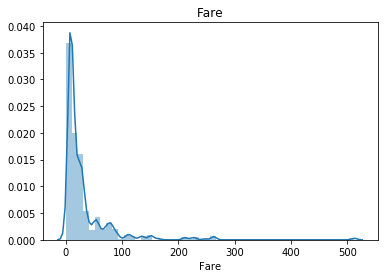

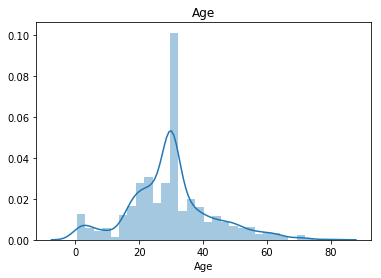

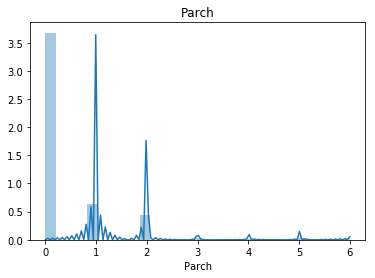

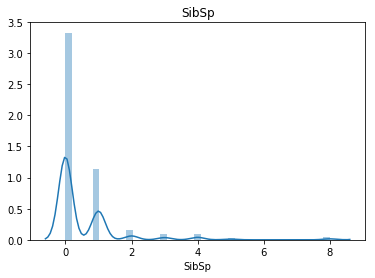

In [28]:
for col in numerical_feature:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

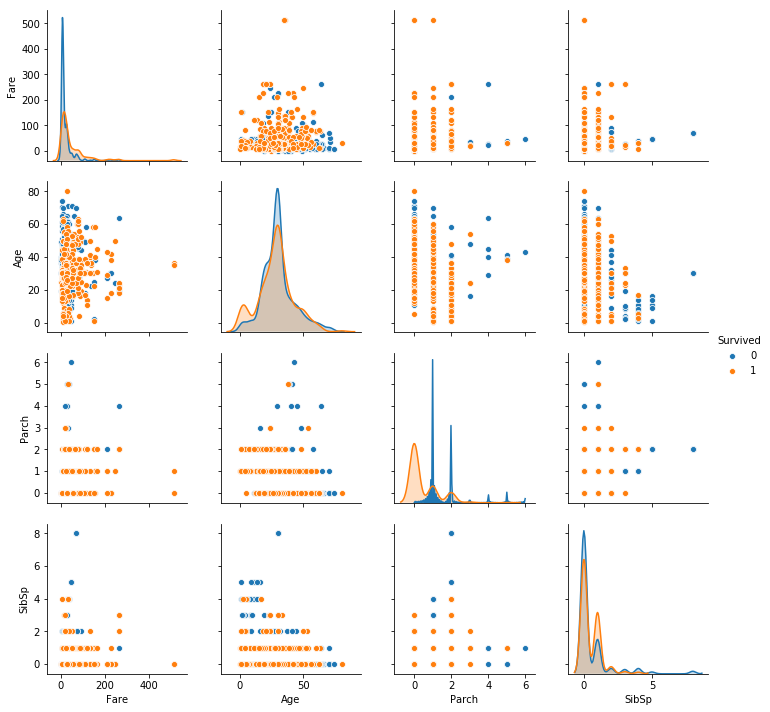

In [29]:
sns.pairplot(df[list(numerical_feature) + ['Survived']], hue='Survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

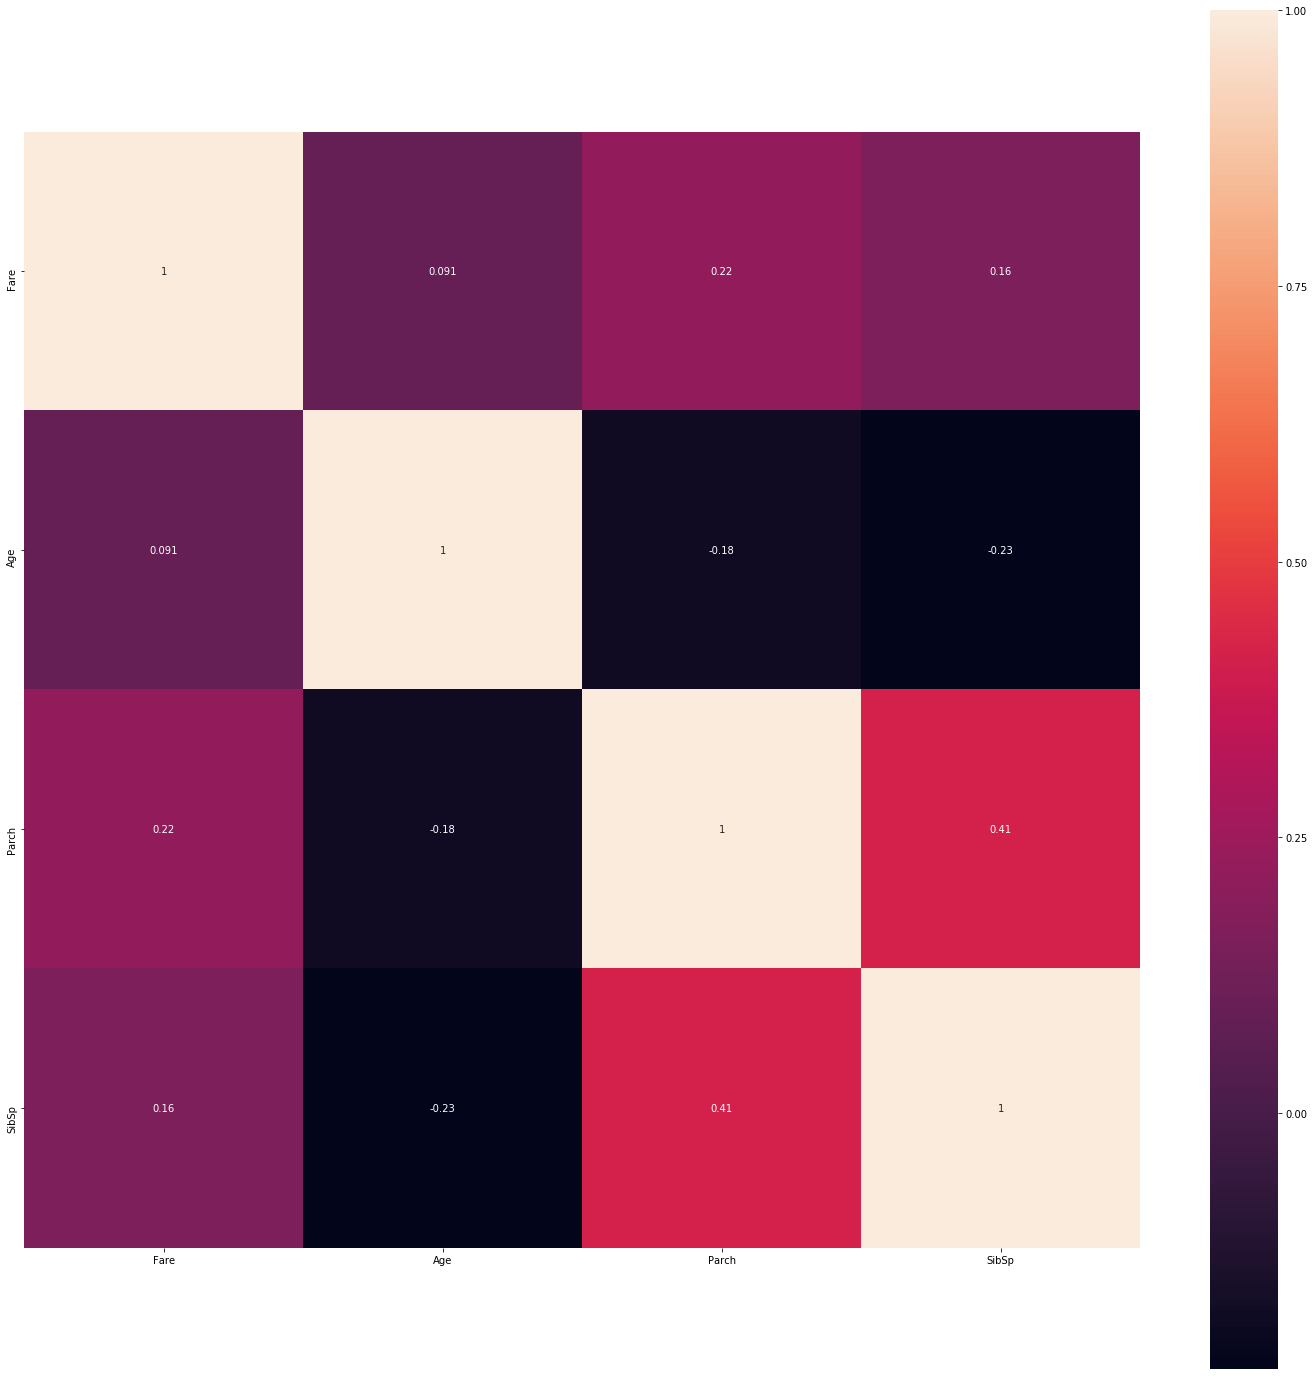

In [40]:
corrmat = df[list(numerical_feature) + ['Survived']].corr()
f, ax = plt.subplots(figsize = (25, 25))
sns.heatmap(corrmat, vmax = 1, square=True, annot=True)

## 명목형, 수치형 변수 간 살펴보기

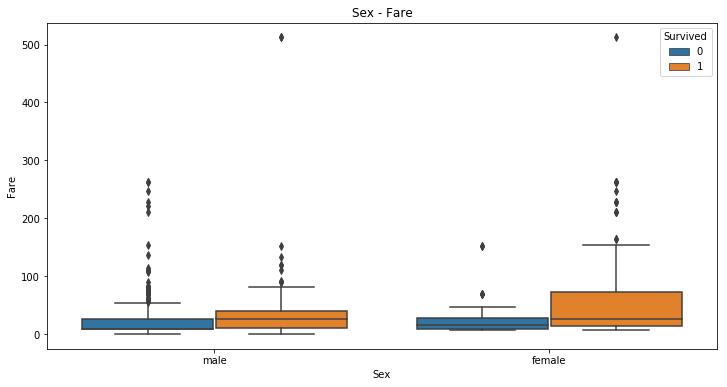

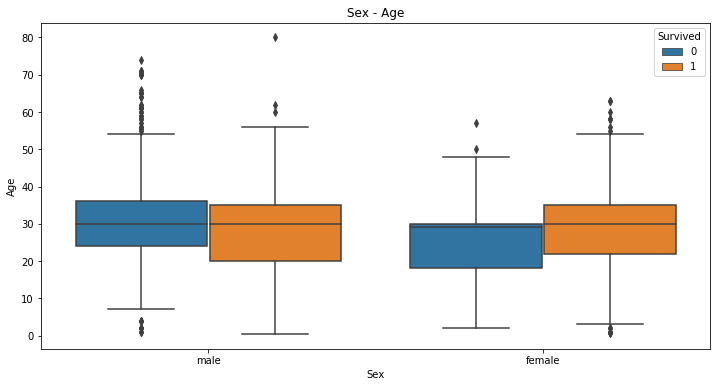

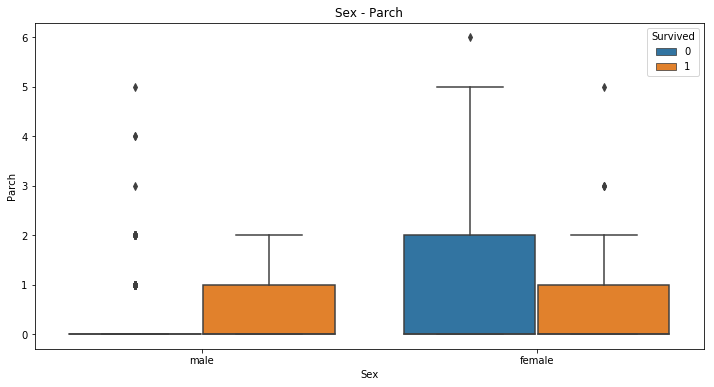

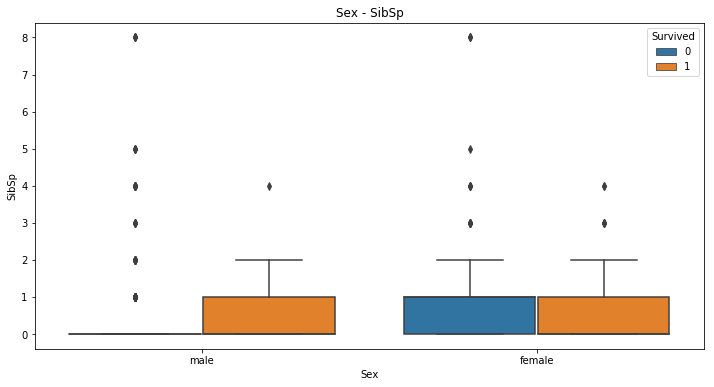

In [30]:
unique_list = df['Sex'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Sex', y=col, hue='Survived', data=df.dropna())
    plt.title("Sex - {}".format(col))
    plt.show()

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## 분류 예측

In [90]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1].astype('int')
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,2
1,1,female,38.0,1,0,71.2833,0
2,3,female,26.0,0,0,7.9250,2
3,1,female,35.0,1,0,53.1000,2
4,3,male,35.0,0,0,8.0500,2


In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,1] = le.fit_transform(X.iloc[:,1])
X.iloc[:,6] = le.fit_transform(X.iloc[:,6].astype(str))
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200, random_state = 0)

In [94]:
model = clf.fit(X_train, y_train)

In [95]:
predictions = clf.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[124,  15],
       [ 21,  63]], dtype=int64)

In [98]:
(124+63)/(124+63+21+15)

0.8385650224215246